In [64]:
import pandas as pd
import altair as alt

alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [65]:
position = 'DEF'
week = '1'
PATH = 'data/week' + week + '/' + position + '/'

In [66]:
df = pd.read_csv(PATH + position + '.csv')
df.head()

,Team,Games,Sack,FumbleRecovery,Interception,DEFTD,PointsAllowed,PassingYardsAllowed,RushingYardsAllowed,Safety,KickTD,FantasyPoints,FantasyPointsPerGame
0,San Francisco 49ers,1,3,1,3,2,17,194.0,121.0,0,0,23.0,23.0
1,Tennessee Titans,1,5,0,3,1,13,285.0,102.0,0,0,17.0,17.0
2,New York Jets,1,1,2,2,1,17,254.0,128.0,0,0,15.0,15.0
3,Seattle Seahawks,1,5,3,0,0,20,418.0,34.0,0,0,11.0,11.0
4,Tampa Bay Buccaneers,1,1,1,1,1,31,166.0,98.0,0,0,11.0,11.0


In [67]:
df.columns

Index(['Team', 'Games', 'Sack', 'FumbleRecovery', 'Interception', 'DEFTD',
       'PointsAllowed', 'PassingYardsAllowed', 'RushingYardsAllowed', 'Safety',
       'KickTD', 'FantasyPoints', 'FantasyPointsPerGame'],
      dtype='object')

In [68]:
data = df[['Team', 'Sack', 'FumbleRecovery', 'Interception', 'DEFTD',
       'PointsAllowed', 'PassingYardsAllowed', 'RushingYardsAllowed', 'Safety',
       'KickTD', 'FantasyPoints']].copy()

In [69]:
# Create sorted list of teams in dataframe
# Data is defined below, above charts
teams = sorted((data['Team'].unique()))
teams[:5]

['Arizona Cardinals',
 'Atlanta Falcons',
 'Baltimore Ravens',
 'Buffalo Bills',
 'Carolina Panthers']

In [70]:
# Create list of team colors, comment colors for missing teams
color_codes = [
    '#97233F', #ARI
    '#A71930', #ATL
    '#241773', #BAL
    '#00338D', #BUF
    '#0085CA', #CAR
    '#C83803', #CHI
    '#FB4F14', #CIN
    '#311D00', #CLE
    '#869397', #DAL
    '#FB4F14', #DEN
    '#0076B6', #DET
    '#203731', #GB
    '#03202F', #HOU
    '#002C5F', #IND
    '#006778', #JAC
    '#E31837', #KC
    '#FFC20E', #LAC
    '#866D4B', #LAR
    '#FC4C02', #MIA
    '#4F2683', #MIN
    '#002244', #NE
    '#D3BC8D', #NO
    '#0B2265', #NYG
    '#125740', #NYJ
    '#000000', #OAK
    '#004C54', #PHI
    '#FFB612', #PIT
    '#AA0000', #SF
    '#69BE28', #SEA
    '#D50A0A', #TB
    '#418FDE', #TEN
    '#773141' #WAS
]

## Fantasy Points

In [73]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        ),
        legend = None
    )
).properties(title = 'Week 1: Fantasy Points by Defenses')

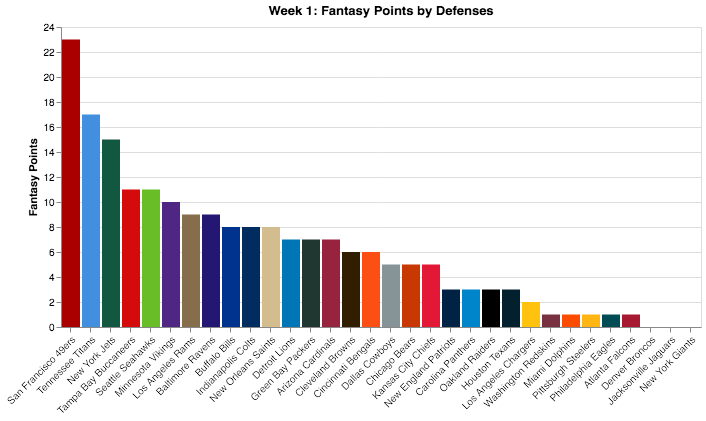

In [74]:
chart

In [75]:
chart.save(PATH + 'plots/DEF_fantasypoints_color.png', scale_factor=3.0)

In [76]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Fantasy Points by Defenses')

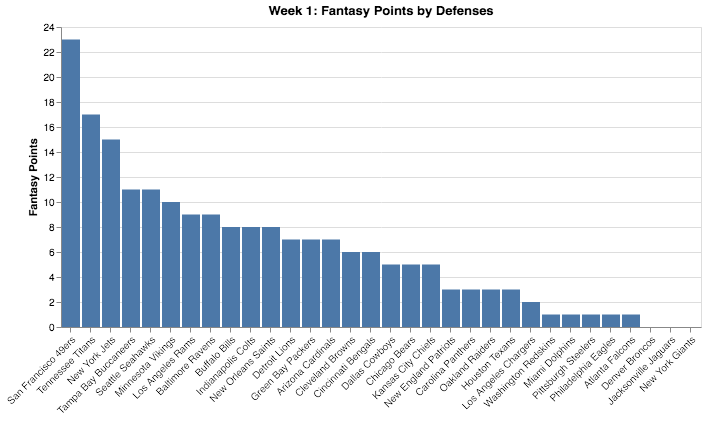

In [77]:
chart

In [78]:
chart.save(PATH + 'plots/DEF_fantasypoints_plain.png', scale_factor=3.0)

## Turnovers (Fumble Recoveries, Interceptions, Safety)

In [79]:
data['Turnovers'] = data['FumbleRecovery'] + data['Interception'] + data['Safety']

In [80]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Turnovers:Q',
        axis = alt.Axis(title = 'Turnovers',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'Turnovers',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        ),
        legend = None
    )
).properties(title = 'Week 1: Turnovers by Defenses')

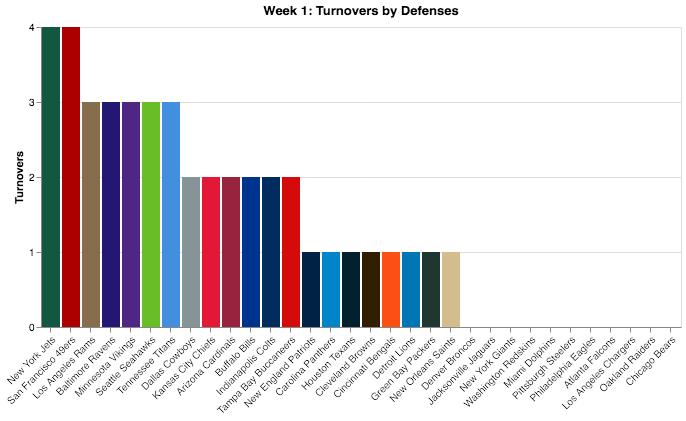

In [81]:
chart

In [82]:
chart.save(PATH + 'plots/DEF_turnovers_color.png', scale_factor=3.0)

In [83]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Turnovers:Q',
        axis = alt.Axis(title = 'Turnovers',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'Turnovers',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Turnovers by Defenses')

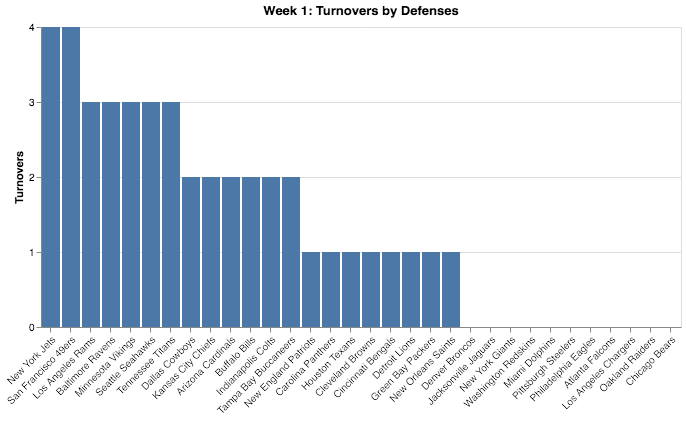

In [84]:
chart

In [85]:
chart.save(PATH + 'plots/DEF_turnovers_plain.png', scale_factor=3.0)

## Sacks

In [86]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Sack:Q',
        axis = alt.Axis(title = 'Sacks',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'Sack',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        ),
        legend = None
    )
).properties(title = 'Week 1: Sacks by Defenses')

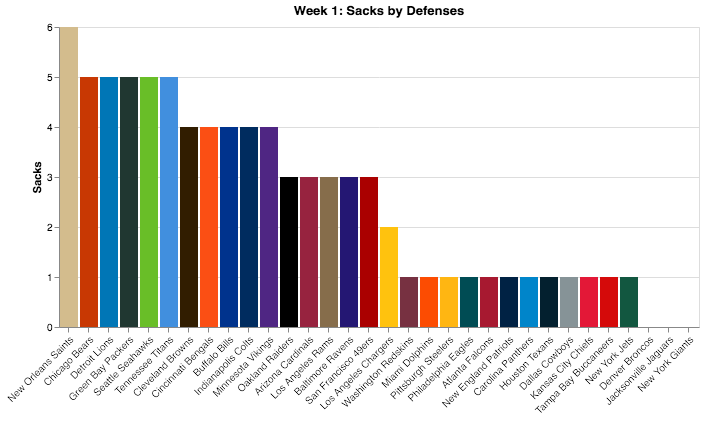

In [87]:
chart

In [88]:
chart.save(PATH + 'plots/DEF_sacks_color.png', scale_factor=3.0)

In [89]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Sack:Q',
        axis = alt.Axis(title = 'Sacks',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'Sack',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Sacks by Defenses')

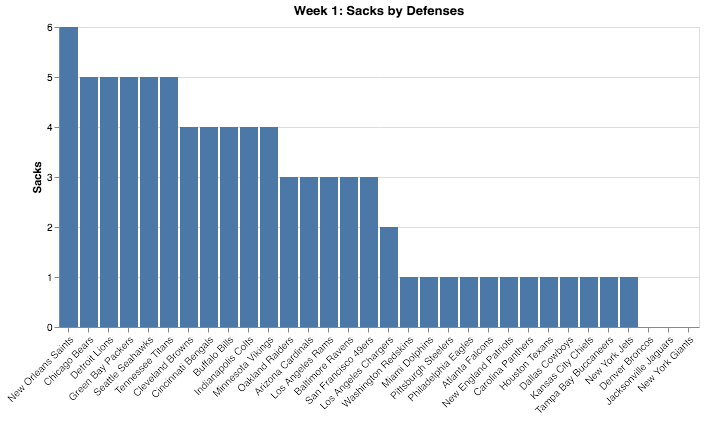

In [90]:
chart

In [91]:
chart.save(PATH + 'plots/DEF_sacks_plain.png', scale_factor=3.0)

## Passing Yards Allowed

In [92]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingYardsAllowed:Q',
        axis = alt.Axis(title = 'Passing Yards Allowed',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'PassingYardsAllowed',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        ),
        legend = None
    )
).properties(title = 'Week 1: Passing Yards Allowed by Defenses')

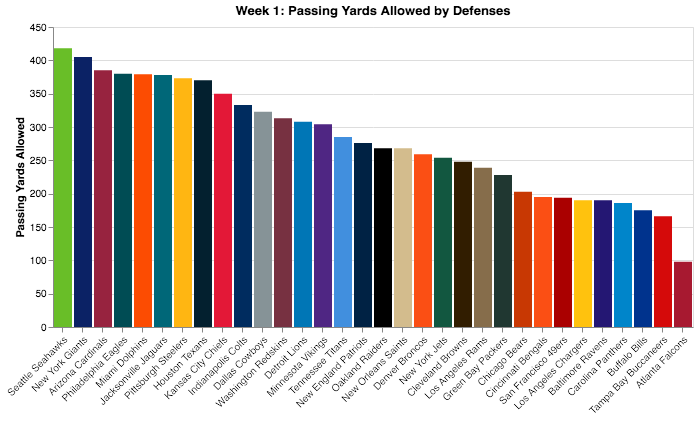

In [93]:
chart

In [94]:
chart.save(PATH + 'plots/DEF_pya_color.png', scale_factor=3.0)

In [95]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PassingYardsAllowed:Q',
        axis = alt.Axis(title = 'Passing Yards Allowed',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'PassingYardsAllowed',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Passing Yards Allowed by Defenses')

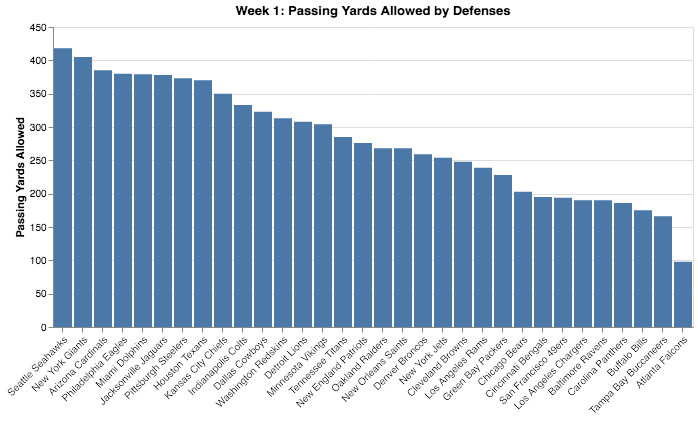

In [96]:
chart

In [97]:
chart.save(PATH + 'plots/DEF_pya_plain.png', scale_factor=3.0)

## Rushing Yards Allowed

In [98]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'RushingYardsAllowed:Q',
        axis = alt.Axis(title = 'Rushing Yards Allowed',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'RushingYardsAllowed',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        ),
        legend = None
    )
).properties(title = 'Week 1: Rushing Yards Allowed by Defenses')

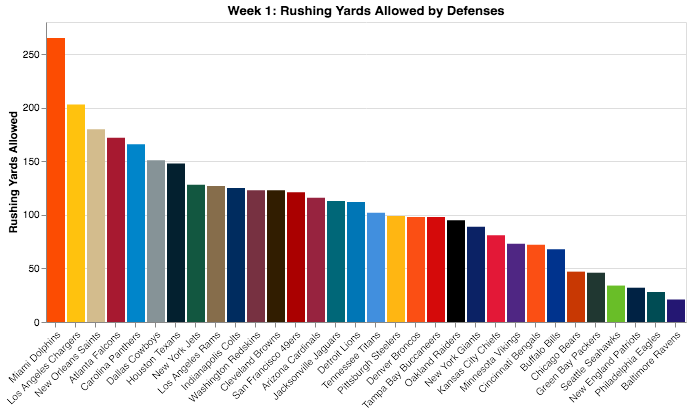

In [99]:
chart

In [100]:
chart.save(PATH + 'plots/DEF_rya_color.png', scale_factor=3.0)

In [101]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'RushingYardsAllowed:Q',
        axis = alt.Axis(title = 'Rushing Yards Allowed',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'RushingYardsAllowed',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Rushing Yards Allowed by Defenses')

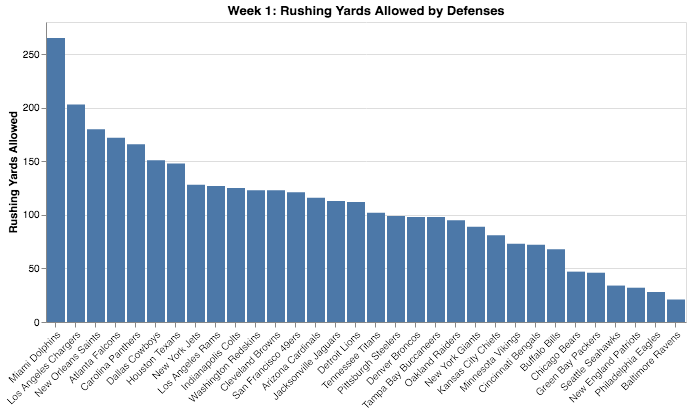

In [102]:
chart

In [103]:
chart.save(PATH + 'plots/DEF_rya_plain.png', scale_factor=3.0)

## Points Allowed

In [104]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PointsAllowed:Q',
        axis = alt.Axis(title = 'Points Allowed',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'PointsAllowed',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        ),
        legend = None
    )
).properties(title = 'Week 1: Points Allowed by Defenses')

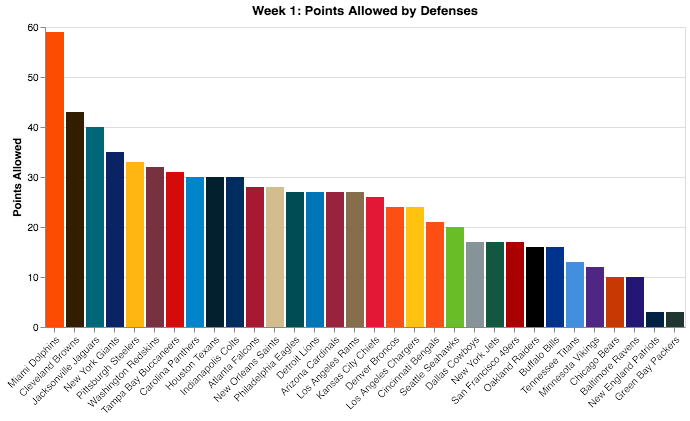

In [105]:
chart

In [106]:
chart.save(PATH + 'plots/DEF_pa_color.png', scale_factor=3.0)

In [108]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'PointsAllowed:Q',
        axis = alt.Axis(title = 'Points Allowed',
                       tickMinStep = 1)
    ),
    alt.X(
        'Team:N',
        sort = alt.EncodingSortField(
            field = 'PointsAllowed',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Points Allowed by Defenses')

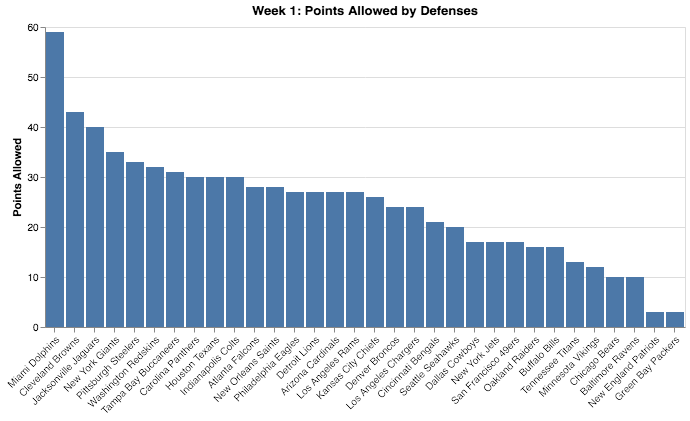

In [109]:
chart

In [110]:
chart.save(PATH + 'plots/DEF_pa_plain.png', scale_factor=3.0)